## Import and Preprocessing

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
# Read in the Stock Market Dataset_share.csv file as df
df = pd.read_csv(r'/Users/juliaseel/Desktop/Data Science/US Stock Market Analysis/Stock_Market_Dataset_Share.csv')

In [3]:
df = df.drop(['date', 'apple_vol', 'price_diff_apple', 'percent_price_diff_apple', 'vol_diff_apple', 'percent_vol_diff_apple', 'microsoft_price', 'price_diff_microsoft', 'percent_price_diff_microsoft', 'microsoft_vol', 'vol_diff_microsoft', 'percent_vol_diff_microsoft', 'google_price', 'price_diff_google', 'percent_price_diff_google', 'google_vol', 'vol_diff_google', 'percent_vol_diff_google', 'nvidia_price', 'price_diff_nvidia', 'percent_price_diff_nvidia', 'nvidia_vol', 'vol_diff_nvidia', 'percent_vol_diff_nvidia', 'meta_price', 'price_diff_meta', 'percent_price_diff_meta', 'meta_vol', 'vol_diff_meta', 'percent_vol_diff_meta'], axis=1)

In [4]:
df = df.rename(columns = {'Unnamed: 0':'days'})

In [5]:
df

,days,apple_price
0,0,185.85
1,1,186.86
2,2,184.40
3,3,188.04
4,4,191.73
...,...,...
1238,1238,42.60
1239,1239,42.73
1240,1240,43.56
1241,1241,43.55


## Training Regression Model

In [6]:
# Import RandomForestRegressor to use as model type and train_test_split for testing and training the data in the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('apple_price', axis=1), df.apple_price

In [7]:
X

,days
0,0
1,1
2,2
3,3
4,4
...,...
1238,1238
1239,1239
1240,1240
1241,1241


In [8]:
y

0       185.85
1       186.86
2       184.40
3       188.04
4       191.73
         ...  
1238     42.60
1239     42.73
1240     43.56
1241     43.55
1242     42.81
Name: apple_price, Length: 1243, dtype: float64

In [9]:
# 20% is used to test and 80% to train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
reg = RandomForestRegressor(n_jobs=-1)
# (n_jobs=-1) increases the number of used processors

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [11]:
# Immediate test evaluation 
reg.score(X_test, y_test)

0.998037447701218

In [12]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on the test data
y_pred = reg.predict(X_test)

# Compare the predictions to the actual values and calculate different scores
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.998037447701218
MAE: 1.4785052208835325
MSE: 3.792280792369486
RMSE: 1.947377927462845


Text(0.5, 1.0, 'Prediction VS Current Price')

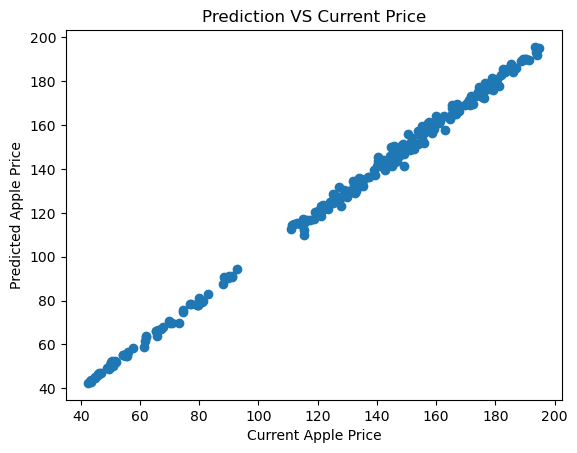

In [13]:
# Visualize the result
plt.scatter(y_test, y_pred)
plt.xlabel('Current Apple Price')
plt.ylabel('Predicted Apple Price')
plt.title('Prediction VS Current Price')

In [14]:
# More calculated informations about apple_price
df.apple_price.describe()

count    1243.000000
mean      125.566533
std        46.114122
min        42.360000
25%        79.505000
50%       136.760000
75%       162.915000
max       198.110000
Name: apple_price, dtype: float64

In [15]:
# This shows what column/value has the highest impact on the price. 
# In this case it is not representative because there is no editional data. Only to show case!
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('days', 1.0)]

<BarContainer object of 1 artists>

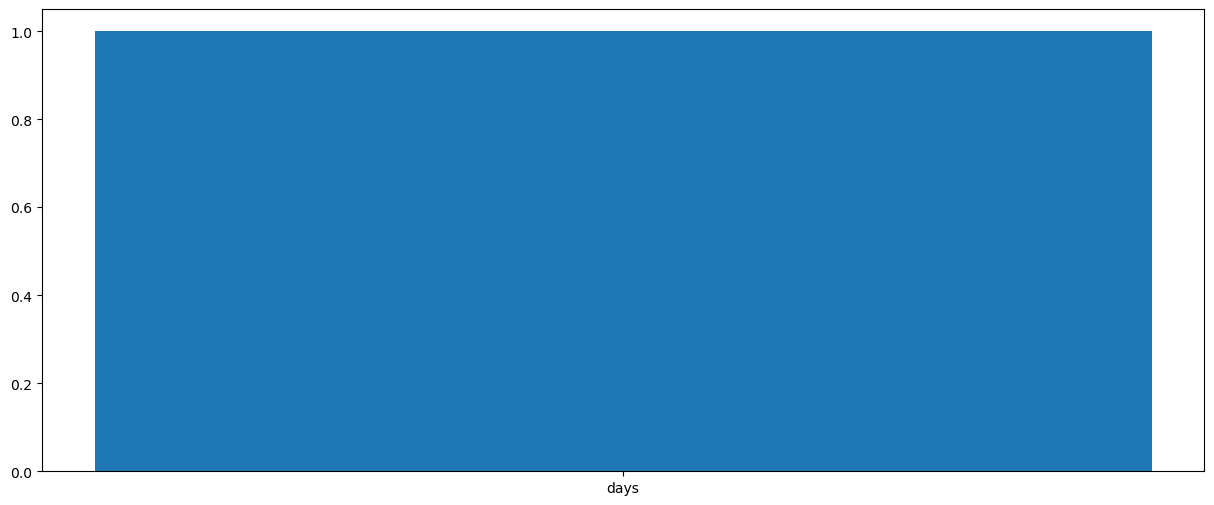

In [16]:
# Plot the result
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [17]:
# Hyperparameter tuning using randomized search cross validation to get a better result
from sklearn.model_selection import RandomizedSearchCV

# To generate random values
import scipy
from scipy.stats import randint

# With rantint we create ranges to pick the random values
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf':randint(1, 5),
    'max_features':[1.0, 'auto', 'sqrt'] 
}

# To run this randomized search
reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                  scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regessor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Users/juliaseel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juliaseel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juliaseel/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/juliaseel/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  

In [18]:
# Now we have a better score from the test. The performace have improved a bit.
best_regessor.score(X_test, y_test)

0.9979711387731159

In [19]:
# We have a better score in all values
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regessor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9979711387731159
MAE: 1.5148410003989254
MSE: 3.920410918919581
RMSE: 1.9800027573010046


Text(0.5, 1.0, 'Prediction VS Current Price')

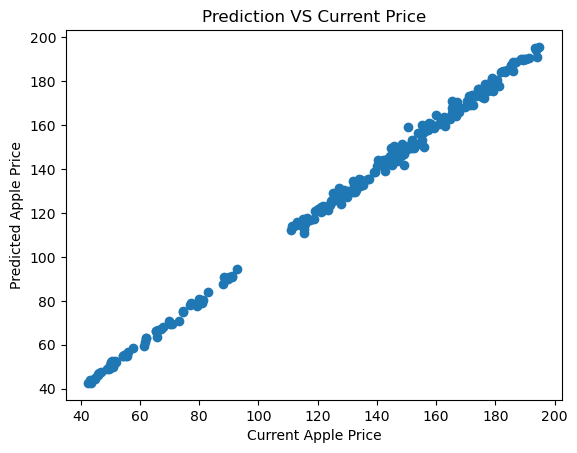

In [20]:
# The plotted result
plt.scatter(y_test, y_pred)
plt.xlabel('Current Apple Price')
plt.ylabel('Predicted Apple Price')
plt.title('Prediction VS Current Price')